In [76]:
import pyreadr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
result = pyreadr.read_r('../data/in/gss.rdata')
df = result['gss']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38116 entries, 0 to 38115
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   YEAR      38116 non-null  int32  
 1   WRKSTAT   38116 non-null  int32  
 2   MARITAL   38116 non-null  int32  
 3   AGEWED    25581 non-null  object 
 4   CHILDS    37982 non-null  object 
 5   AGE       37981 non-null  object 
 6   EDUC      37998 non-null  object 
 7   PAEDUC    27401 non-null  object 
 8   MAEDUC    31783 non-null  object 
 9   DEGREE    37979 non-null  object 
 10  PADEG     29531 non-null  object 
 11  MADEG     33677 non-null  object 
 12  FEMALE    38116 non-null  float64
 13  RACE      38116 non-null  int32  
 14  INCOME    33147 non-null  object 
 15  INCOME98  2503 non-null   object 
 16  RELIG     38116 non-null  int32  
 17  FUND      36852 non-null  float64
 18  ATTEND    37724 non-null  object 
 19  RELITEN   33699 non-null  float64
 20  PRAY      15103 non-null  fl

In [78]:
print(df.columns)

Index(['YEAR', 'WRKSTAT', 'MARITAL', 'AGEWED', 'CHILDS', 'AGE', 'EDUC',
       'PAEDUC', 'MAEDUC', 'DEGREE', 'PADEG', 'MADEG', 'FEMALE', 'RACE',
       'INCOME', 'INCOME98', 'RELIG', 'FUND', 'ATTEND', 'RELITEN', 'PRAY',
       'PRAYER', 'BIBLE', 'HAPPY', 'ALIKE1', 'ALIKE2', 'ALIKE3', 'ALIKE4',
       'ALIKE5', 'ALIKE6', 'ALIKE7', 'ALIKE8', 'AGEWEDCR', 'HAPUNHAP',
       'REALINC', 'WORDSUM'],
      dtype='object')


In [79]:
columns = ['YEAR', 'AGE', 'WRKSTAT', 'MARITAL', 'CHILDS', 'EDUC', 'DEGREE', 'FEMALE', 'INCOME', 'INCOME98', 'HAPPY']
dfa = df[columns]

In [80]:
dfa.isna().sum()

YEAR            0
AGE           135
WRKSTAT         0
MARITAL         0
CHILDS        134
EDUC          118
DEGREE        137
FEMALE          0
INCOME       4969
INCOME98    35613
HAPPY           0
dtype: int64

In [81]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38116 entries, 0 to 38115
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   YEAR      38116 non-null  int32  
 1   AGE       37981 non-null  object 
 2   WRKSTAT   38116 non-null  int32  
 3   MARITAL   38116 non-null  int32  
 4   CHILDS    37982 non-null  object 
 5   EDUC      37998 non-null  object 
 6   DEGREE    37979 non-null  object 
 7   FEMALE    38116 non-null  float64
 8   INCOME    33147 non-null  object 
 9   INCOME98  2503 non-null   object 
 10  HAPPY     38116 non-null  int32  
dtypes: float64(1), int32(4), object(6)
memory usage: 2.6+ MB


In [82]:
dfa = dfa.astype('Int32')

In [83]:
dfa['INCOME']

0        <NA>
1        <NA>
2        <NA>
3        <NA>
4        <NA>
         ... 
38111      11
38112      10
38113      11
38114      12
38115      12
Name: INCOME, Length: 38116, dtype: Int32

In [84]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38116 entries, 0 to 38115
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   YEAR      38116 non-null  Int32
 1   AGE       37981 non-null  Int32
 2   WRKSTAT   38116 non-null  Int32
 3   MARITAL   38116 non-null  Int32
 4   CHILDS    37982 non-null  Int32
 5   EDUC      37998 non-null  Int32
 6   DEGREE    37979 non-null  Int32
 7   FEMALE    38116 non-null  Int32
 8   INCOME    33147 non-null  Int32
 9   INCOME98  2503 non-null   Int32
 10  HAPPY     38116 non-null  Int32
dtypes: Int32(11)
memory usage: 2.0 MB


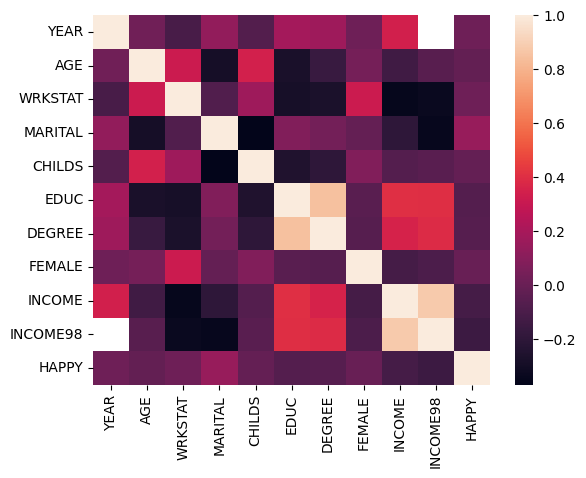

In [85]:
dataplot = sns.heatmap(dfa.corr())

In [86]:
dfa['WRKSTAT']

0        1
1        5
2        2
3        1
4        7
        ..
38111    1
38112    1
38113    5
38114    1
38115    2
Name: WRKSTAT, Length: 38116, dtype: Int32

In [87]:
marital_count = dfa[['YEAR', 'MARITAL']].groupby(['MARITAL']).count()

In [88]:
marital_count.shape

(6, 1)

In [89]:
cols = ['CHILDS', 'DEGREE']
dfc = dfa.dropna(subset=cols)

In [90]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37859 entries, 0 to 38115
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   YEAR      37859 non-null  Int32
 1   AGE       37740 non-null  Int32
 2   WRKSTAT   37859 non-null  Int32
 3   MARITAL   37859 non-null  Int32
 4   CHILDS    37859 non-null  Int32
 5   EDUC      37804 non-null  Int32
 6   DEGREE    37859 non-null  Int32
 7   FEMALE    37859 non-null  Int32
 8   INCOME    32997 non-null  Int32
 9   INCOME98  2490 non-null   Int32
 10  HAPPY     37859 non-null  Int32
dtypes: Int32(11)
memory usage: 2.3 MB


In [91]:
print(f'min year {dfc["YEAR"].min()}')
print(f'min year {dfc["YEAR"].max()}')

min year 1972
min year 1998


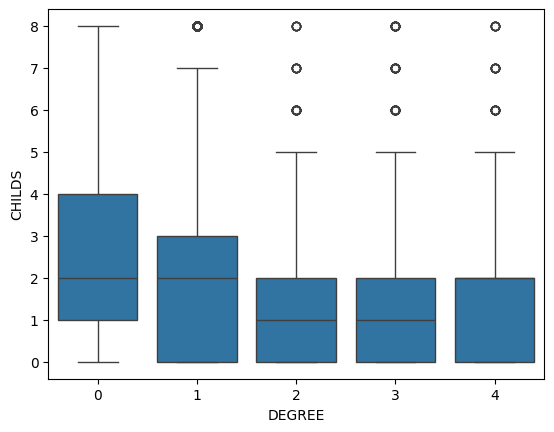

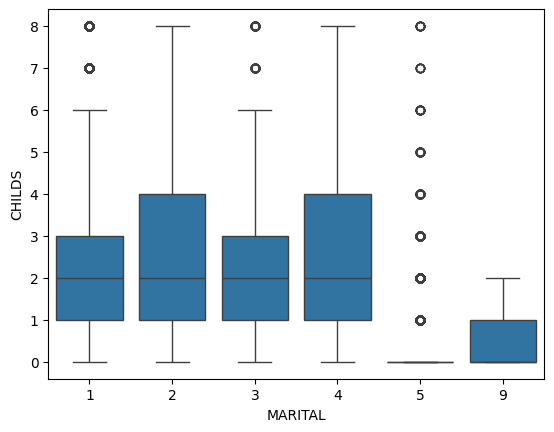

In [92]:
sns.boxplot(data=dfc, x='DEGREE', y='CHILDS')
plt.show()

sns.boxplot(data=dfc, x='MARITAL', y='CHILDS')
plt.show()

# sns.boxplot(data=dfc, x='YEAR', y='CHILDS')
# plt.show()

<Axes: >

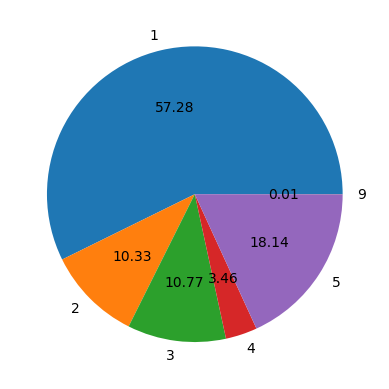

In [93]:
dfc.groupby('MARITAL').size().plot(kind='pie', autopct='%.2f')

<Axes: >

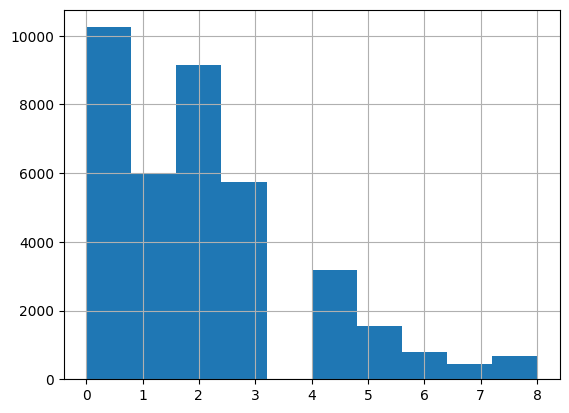

In [94]:
dfc['CHILDS'].hist(bins = 10)

In [95]:
count = dfc.groupby('CHILDS').count()

child_labels = [i for i in range(9)]
count['COUNT'] = count['YEAR']


Text(0.5, 1.0, 'child count')

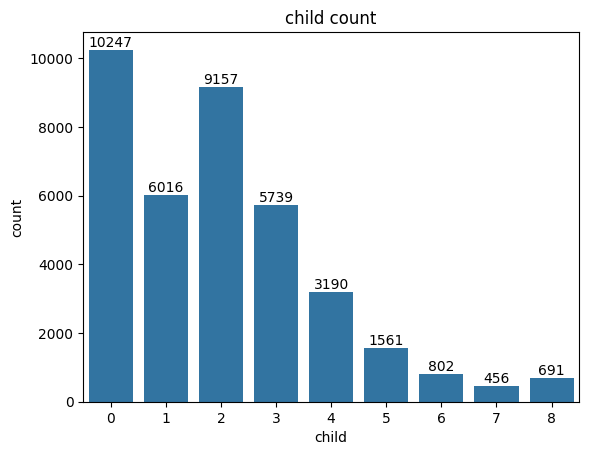

In [96]:
ax = sns.barplot(x=child_labels, y=count['COUNT'])
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_xlabel('child')
ax.set_ylabel('count')
ax.set_title('child count')

In [97]:
df_fil = dfc[(dfc['YEAR'] >= 1990) & (dfc['AGE'] == 40) & (dfc['FEMALE'] == 1)]

In [106]:
df1_index = df_fil[df_fil['DEGREE'] >= 3].index

df1 = df_fil[df_fil.index.isin(df1_index)]
df2 = df_fil[~df_fil.index.isin(df1_index)]

df1 = df1['CHILDS'].astype('float32')
df2 = df2['CHILDS'].astype('float32')

In [102]:
print(df1.info())
print(df2.info())

<class 'pandas.core.series.Series'>
Index: 44 entries, 25713 to 38066
Series name: CHILDS
Non-Null Count  Dtype
--------------  -----
44 non-null     Int32
dtypes: Int32(1)
memory usage: 572.0 bytes
None
<class 'pandas.core.series.Series'>
Index: 111 entries, 25116 to 38112
Series name: CHILDS
Non-Null Count  Dtype
--------------  -----
111 non-null    Int32
dtypes: Int32(1)
memory usage: 1.4 KB
None


In [103]:
min1 = df1.min()
max1 = df1.max()
mean1 = df1.mean()

min2 = df2.min()
max2 = df2.max()
mean2 = df2.mean()

print(f'Set 1 | min: {min1}, max: {max1}, mean: {mean1}')
print(f'Set 2 | min: {min2}, max: {max2}, mean: {mean2}')

Set 1 | min: 0, max: 4, mean: 1.5
Set 2 | min: 0, max: 6, mean: 1.954954954954955


In [104]:
import scipy.stats as stats

In [107]:
result = stats.ttest_ind(a=df1, b=df2, equal_var=False, alternative='less')

In [108]:
print(result)

TtestResult(statistic=-2.070489698143502, pvalue=0.020600508361700503, df=92.24225984977798)
